# CREDIT  RISK MODELLING 

# 1. Setting the Background


The most pressing questions for banks are how efficiently can we guage the risk profile of our customers and how can we use this information to decide on the required liquidity while still maintaining our regulatory obligations. 

With the constantly changing customer portfolio and the ever increasing customer base a more robust non-hardcoded approach is neccessary to achieve these antagonistic goals. 

Thus comes the idea of using machine learning to develop a behavioural scorecard to pull data from both internal sources, customer transactions and their demographic data, to predict the probability of default. 

In this notebook we are going to explore the data cleaning and transformation as well as machine learing modelling in predicting probability of default. We can then use these results to develop a credit rating. 

We will eplore the following concepts in the notebook
1. Data cleaning - Struucturing the data for modelling 
2. What to do with missing values 
3. How to deal with class imbalance and the implications. 


# 2. Libraries and Data Import

### IMPORTING LIBRARIES

In [66]:
# General Libraries 

import warnings
warnings.filterwarnings('ignore')

# Data Explotation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
import missingno as msno # Visualization of missing values

from sklearn.preprocessing import StandardScaler, LabelEncoder
import category_encoders as ce

# Data modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR,SVC
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline
#!pip install imbalanced-learn
#! pip install category_encoders

### LOADING THE DATA

In [2]:
#Loading data 
Loan = pd.read_csv("raw_data.csv")
Loan.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [3]:
#Renaming columns in the dataset with their correct names
Loan_renamed = Loan.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI', 
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler', 
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
Loan_renamed.head(2)

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0


# 3. Basic EDA and Data Cleaning

In [4]:
Loan_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

In [5]:
Loan_renamed.describe()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,...,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable
count,119528.000000,119528.000000,119528.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,...,119528.0,1.928100e+04,1.902800e+04,104467.000000,13431.000000,20433.000000,119528.000000,119528.000000,119528.000000,119528.000000
mean,59764.500000,0.028378,0.473061,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,0.643930,...,0.0,4.302522e+05,1.766494e+05,41415.210047,46.980940,48.208976,1.076877,0.823991,0.344898,0.021869
std,34504.905825,0.166052,0.859042,5.203209,1.091658,575.614365,11016.619745,5.698900,3754.675342,0.969123,...,0.0,8.228143e+05,4.075618e+05,13044.008078,42.716225,41.713826,3.737882,3.172612,1.478180,0.146258
min,1.000000,0.000000,0.000000,2.000000,0.000000,681.000000,10000.000000,6.000000,1001.000000,0.000000,...,0.0,9.900000e+01,1.000000e+00,10000.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,29882.750000,0.000000,0.000000,14.000000,0.000000,1895.000000,30000.000000,18.000000,1368.000000,0.000000,...,0.0,4.490000e+04,3.394050e+04,31000.000000,20.000000,23.000000,0.000000,0.000000,0.000000,0.000000
50%,59764.500000,0.000000,0.000000,17.000000,0.000000,2320.000000,39700.000000,24.000000,2307.000000,0.000000,...,0.0,1.100000e+05,8.800000e+04,42250.000000,31.000000,35.000000,0.000000,0.000000,0.000000,0.000000
75%,89646.250000,0.000000,1.000000,21.000000,1.000000,2689.000000,48000.000000,24.000000,3911.000000,1.000000,...,0.0,4.920000e+05,2.000048e+05,49300.000000,52.000000,55.000000,0.000000,0.000000,0.000000,0.000000
max,119528.000000,1.000000,12.000000,36.000000,29.000000,7840.000000,96000.000000,36.000000,21106.000000,6.000000,...,0.0,2.022777e+07,3.000000e+07,700000.000000,252.000000,268.000000,314.000000,243.000000,96.000000,1.000000


In [6]:
Loan_renamed.shape

(119528, 32)

### MISSINGNESS IN THE DATA

<Axes: >

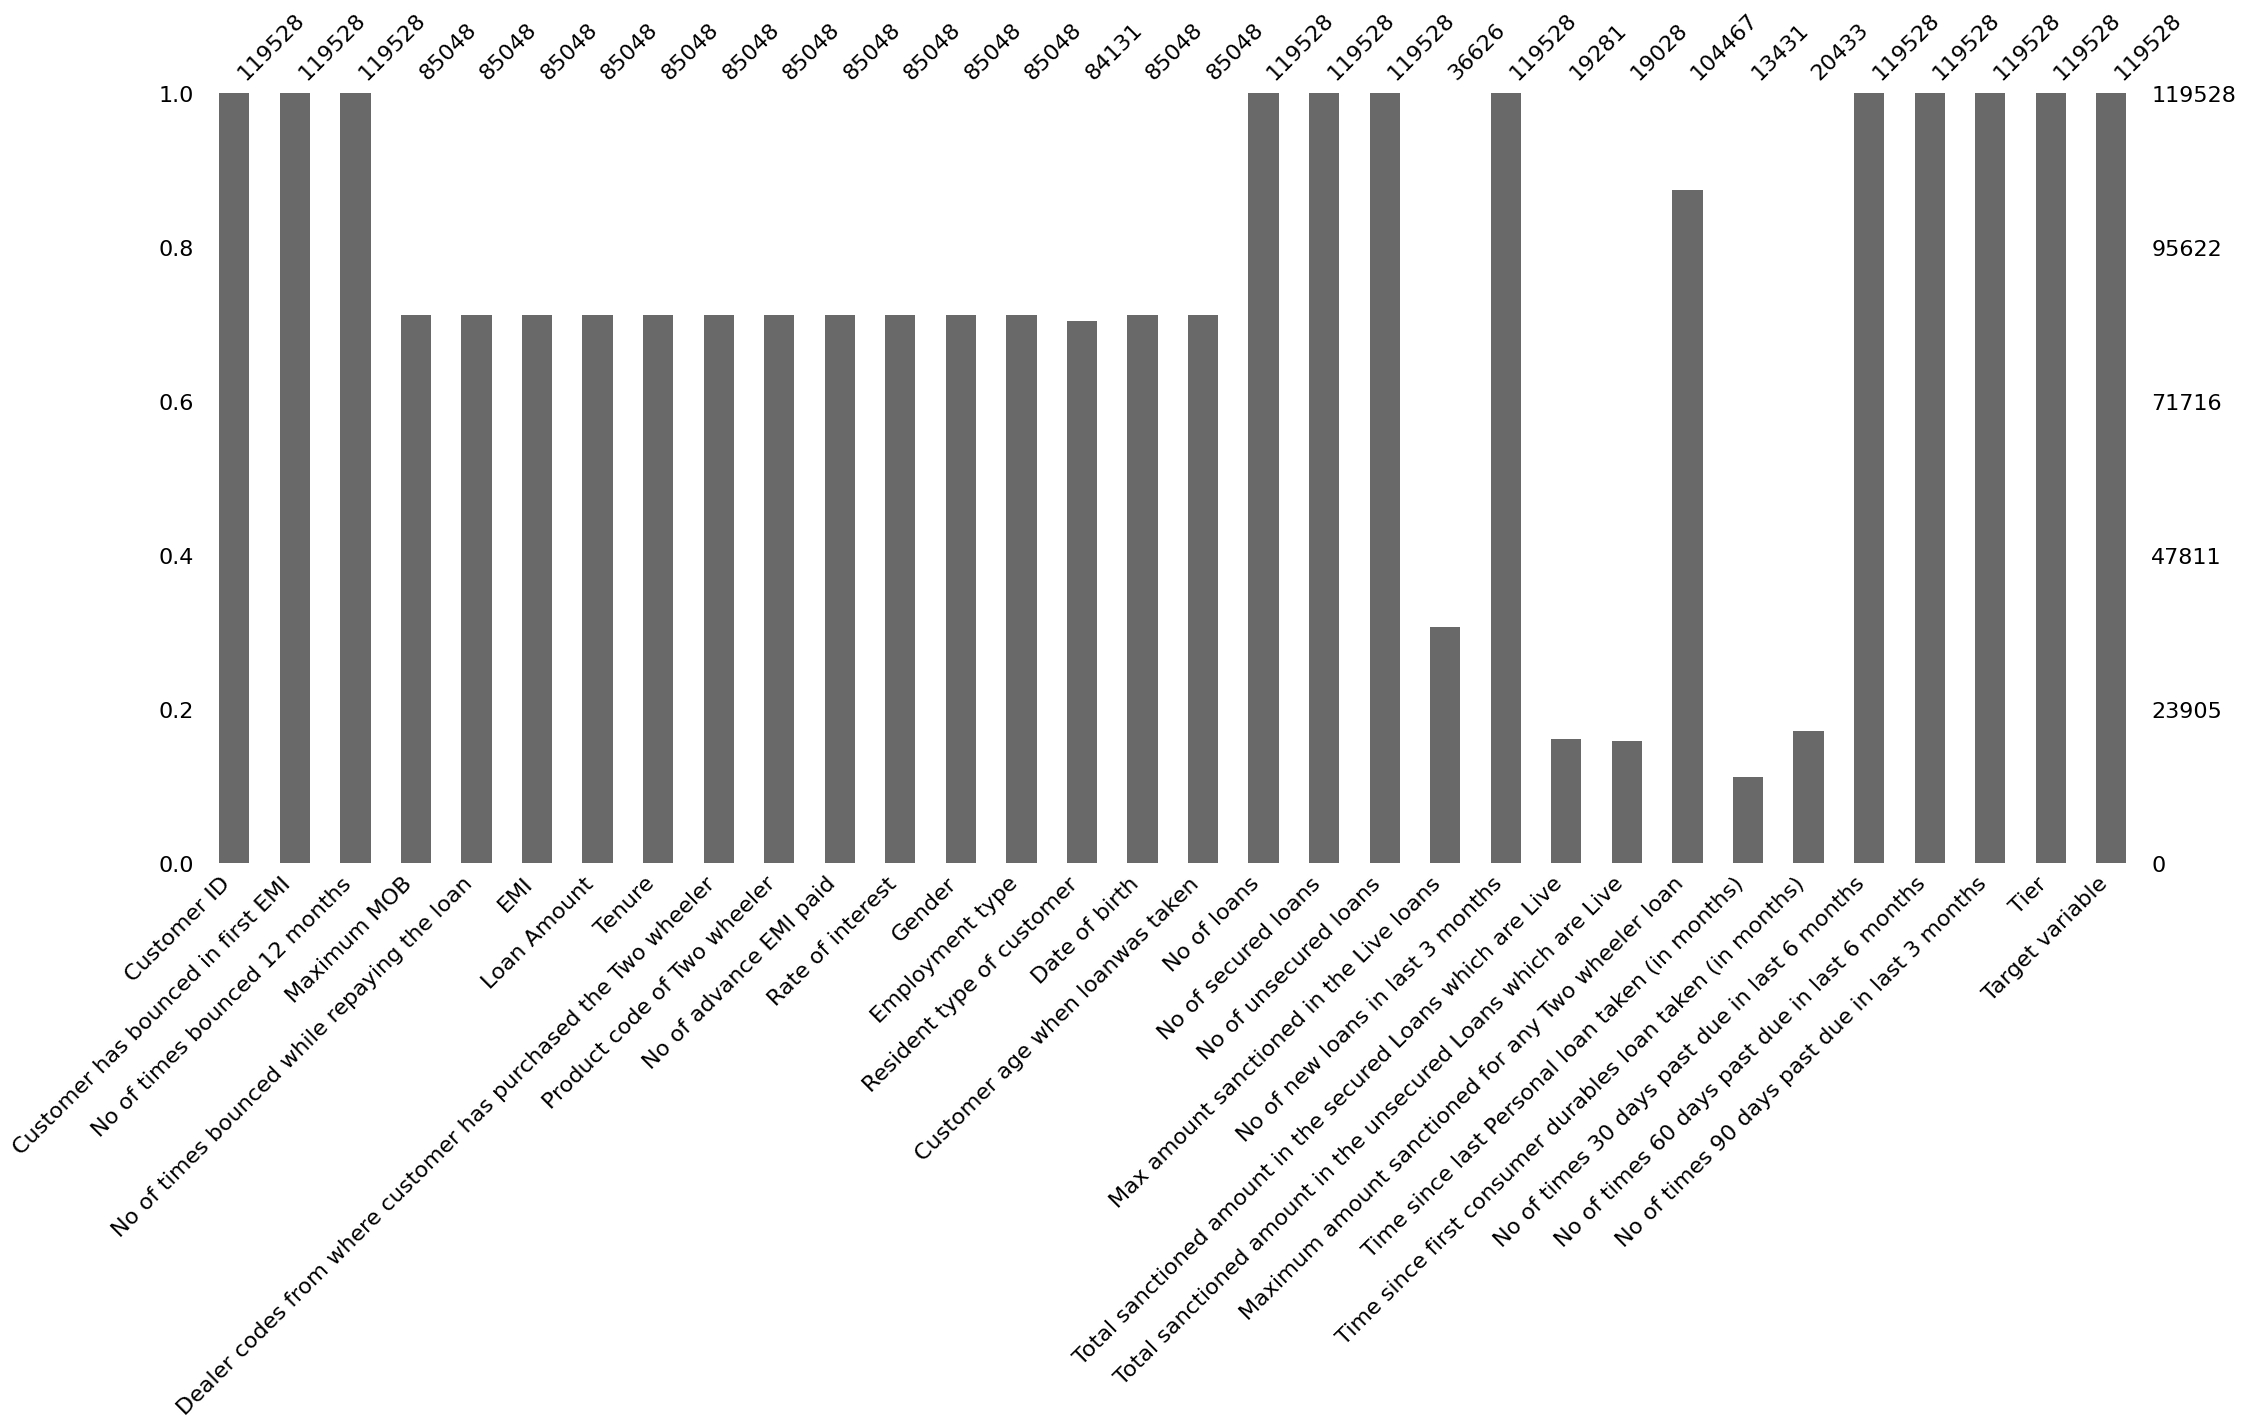

In [7]:
msno.bar(Loan_renamed)

Text(0.5, 1.0, 'MISSINGNESS IN THE DATA')

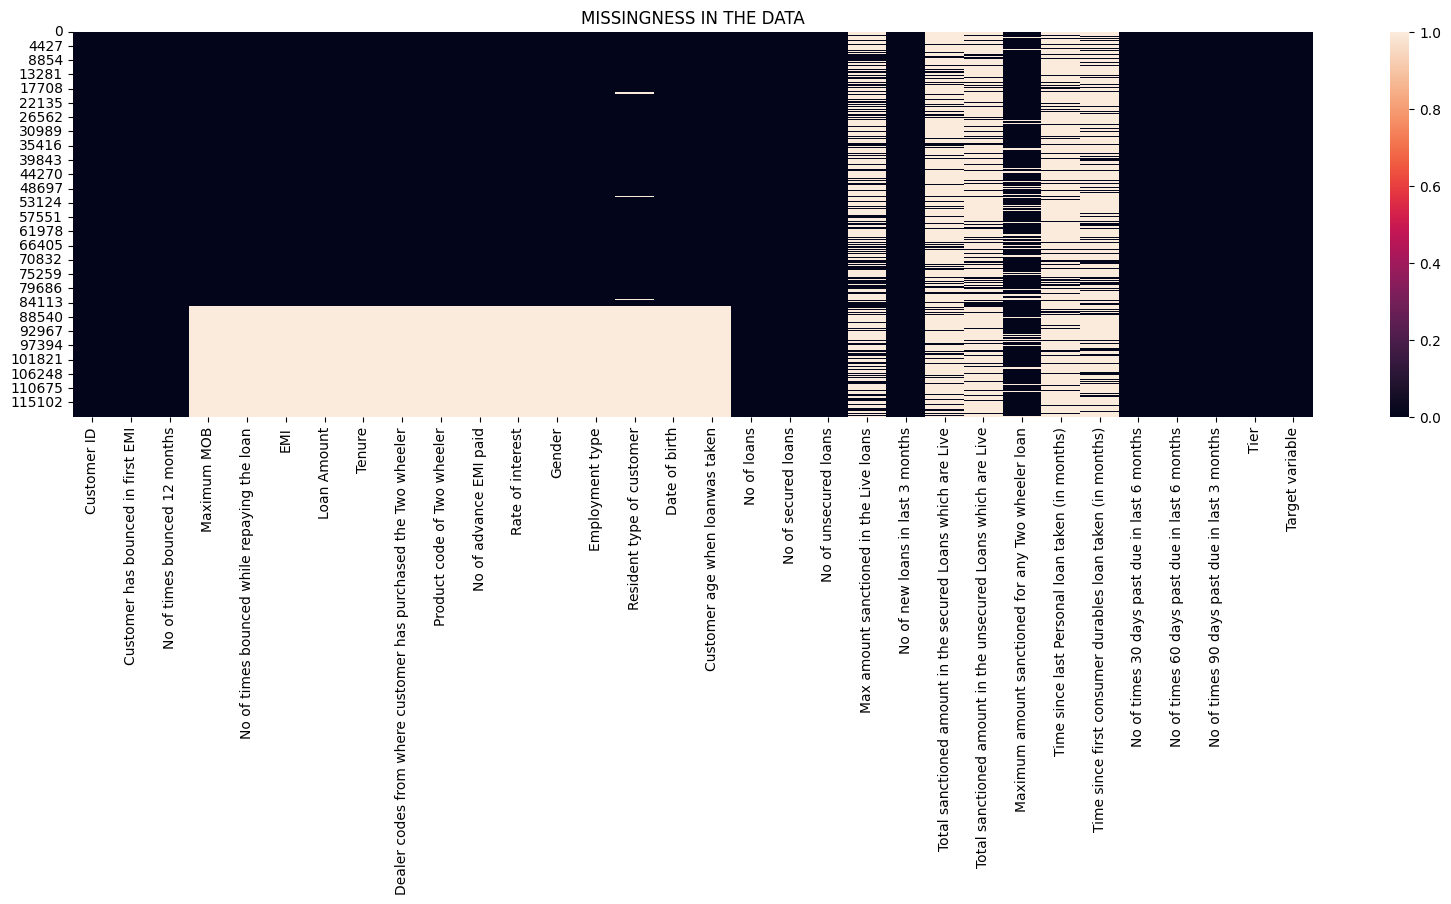

In [8]:
# Missingness in the data
plt.figure(figsize=(20,5))
sns.heatmap(Loan_renamed.isnull())
plt.title('MISSINGNESS IN THE DATA')

As illustrated in the two figures above there are quite a number of features with missing values.

In [9]:
# get the number of missing data points per column
missing_values_count = Loan_renamed.isnull().sum()
# how many total missing values do we have?
total_cells = np.product(Loan_renamed.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

25.818715070945718

- We are missing almost 26% of the data

### Correlation 

<Axes: >

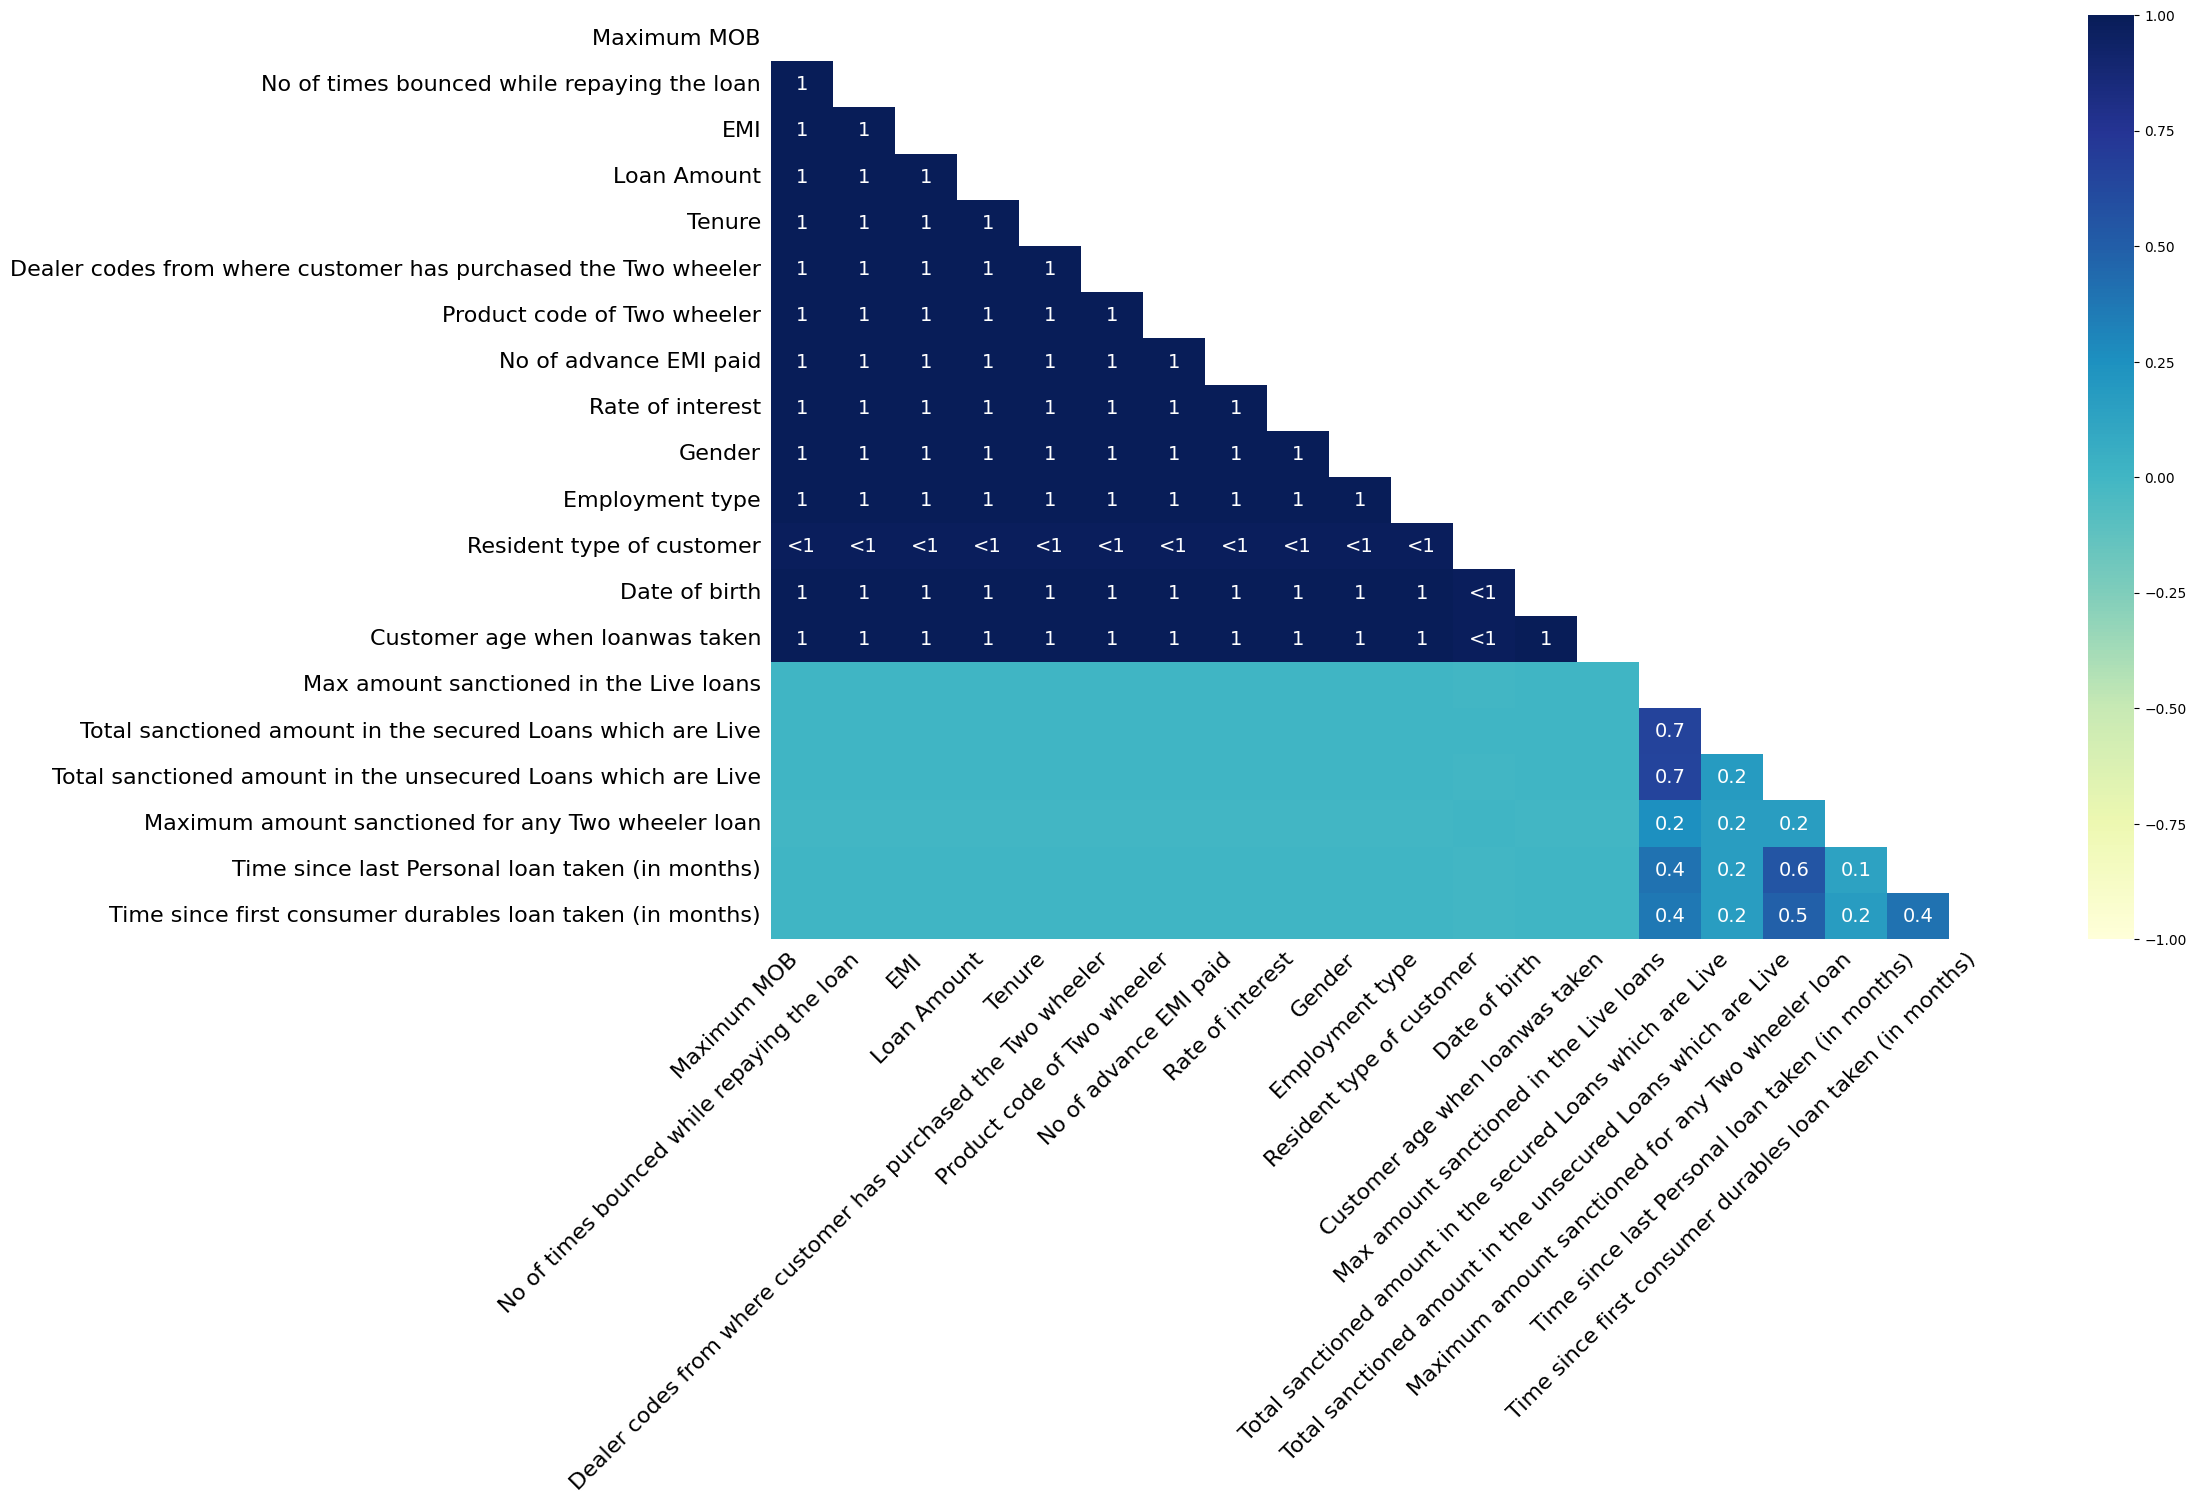

In [10]:
msno.heatmap(Loan_renamed,cmap='YlGnBu')

- variable that appear with -1 have a strong negative correlation (yellow color)
- variables appearing with 0 or not appearing have no effect on one another
- variables appearing with 1 have a strong positve cottelation (if one variable appears the other definitely also does)
- Variables that are always full or always empty have no meaningful correlation, thus the are removed from the visualization.
- values marked <1 or >-1 have a correlation that is almost exactingly negative or positive, but is still not quite good.

In [11]:
#Checking all the columns with missingness
#[col for col in Loan_renamed.columns if Loan_renamed[col].isnull().any()]

### IMBALANCE IN OUR OUTPUT

In [12]:
Loan_renamed["Target variable"].nunique()

2

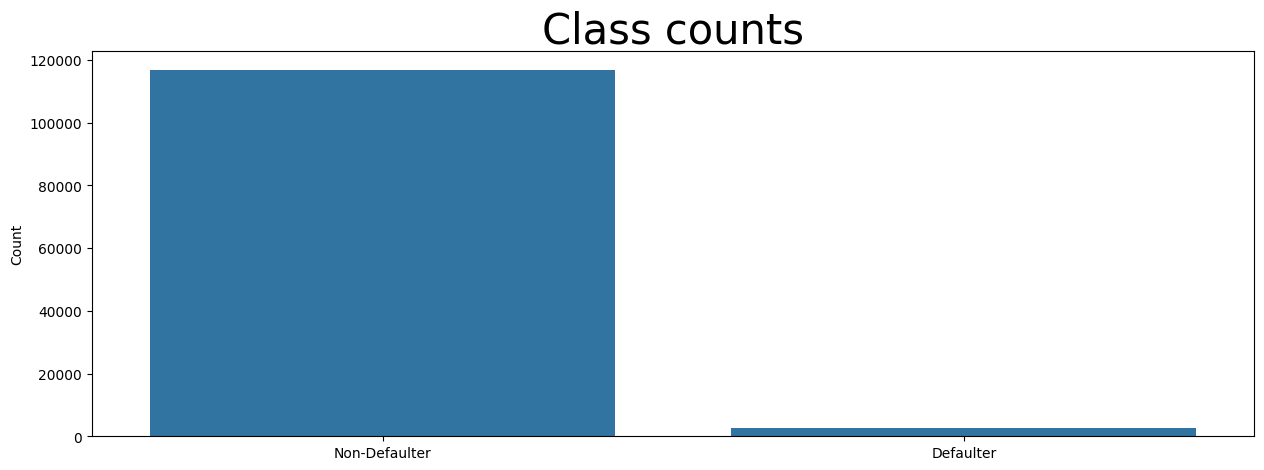

Target variable
Non-Defaulter    116914
Defaulter          2614
Name: count, dtype: int64


In [13]:
# Filter the DataFrame to include only the rows with the desired categories
Loan_filtered = Loan_renamed[Loan_renamed['Target variable'].isin([0, 1])]

# Map the column values to 'Non-Defaulter' and 'Defaulter'
Loan_filtered['Target variable'] = Loan_filtered['Target variable'].map({0: 'Non-Defaulter', 1: 'Defaulter'})

# Plot the count plot
plt.figure(figsize=(15, 5))
sns.countplot(x = Loan_filtered['Target variable'])

# Customize the plot
plt.xticks([0, 1], ["Non-Defaulter", "Defaulter"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", fontdict={"fontsize": 30})

plt.show()

# Print value counts to verify
print(Loan_filtered['Target variable'].value_counts())

The data set is imbalanced as defualters are significanltly less than 5% of the total data.

# 4. DATA CLEANING 

In [14]:
#Dropping coloumns with more than 50% missingness, Aand customer ID 
dropped=['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)',
'Max amount sanctioned in the Live loans','Total sanctioned amount in the secured Loans which are Live',
'Total sanctioned amount in the unsecured Loans which are Live',
'Customer ID',"Date of birth"]

Loan_renamed.drop(dropped,axis=1,inplace=True)

In [15]:
data = Loan_renamed.copy()

Getting my categorical and numerical data sets

In [16]:
categorical = data.select_dtypes(include=['object'])
numerical = data.select_dtypes(include=['float','int'])

#### EXPLOWER the categorical data

In [17]:
categorical.head()

,Product code of Two wheeler,Gender,Employment type,Resident type of customer,Tier
0,SC,FEMALE,HOUSEWIFE,OWNED,TIER 1
1,MO,MALE,SELF,RENT,TIER 1
2,SC,MALE,SELF,RENT,TIER 1
3,SC,FEMALE,SAL,RENT,TIER 1
4,MC,MALE,SAL,RENT,TIER 1


In [18]:
categorical["Tier"].nunique()

4

## Impute the categorical data with mode

In [19]:
categorical.columns[categorical.isnull().any()].tolist()

['Product code of Two wheeler',
 'Gender',
 'Employment type',
 'Resident type of customer']

In [20]:
# Calculate mode for each feature in categorical.
mode_values = categorical.mode().iloc[0]

# Impute missing values with mode
categorical = categorical.fillna(mode_values)

Impute the numerical data with mediam.

In [21]:
numerical.columns[numerical.isnull().any()].tolist()

['Maximum MOB',
 'No of times bounced while repaying the loan',
 'EMI',
 'Loan Amount',
 'Tenure',
 'Dealer codes from where customer has purchased the Two wheeler',
 'No of advance EMI paid',
 'Rate of interest',
 'Customer age when loanwas taken',
 'Maximum amount sanctioned for any Two wheeler loan']

In [22]:
median_value = numerical.median()
numerical = numerical.fillna(median_value)

#### exploring my numerical columns

In [23]:
num_missing = numerical.columns[numerical.isnull().any()]
fig = plt.figure(figsize=(16,20))

for i, var in enumerate(num_missing):
    fig.add_subplot(10, 5, i + 1)
    sns.boxplot(x=numerical[var], color="cyan")

plt.tight_layout()
plt.show()

<Figure size 1600x2000 with 0 Axes>

In [24]:
# fig=plt.figure(figsize=(30,15))
# for var in range(len(numerical.columns)):
#     fig.add_subplot(5,4,var+1)
#     sns.boxplot(x=numerical.iloc[:,var],color="cyan")
# plt.tight_layout()
# plt.show()

# 5. ENCODING THE DATA


LabelEncoder for categorical data

In [25]:
le = LabelEncoder()
for col in categorical:
    categorical[col] = le.fit_transform(categorical[col])

In [26]:
categorical.head()

,Product code of Two wheeler,Gender,Employment type,Resident type of customer,Tier
0,3,0,0,1,0
1,1,1,3,2,0
2,3,1,3,2,0
3,3,0,2,2,0
4,0,1,2,2,0


Encoding the numerical data

In [27]:
#numerical.head()

In [28]:
# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the numerical DataFrame
numerical_scaled= pd.DataFrame(scaler.fit_transform(numerical), columns=numerical.columns)


In [29]:
#numerical_scaled.head(1)

Joining the categorical and the numerical

In [30]:
df1 = pd.concat([categorical,numerical_scaled],axis=1)

In [31]:
#df1.info()

# 6.Model Data Preparation

In [32]:
df1.head(5)

,Product code of Two wheeler,Gender,Employment type,Resident type of customer,Tier,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,...,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,No of new loans in last 3 months,Maximum amount sanctioned for any Two wheeler loan,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable
0,3,0,0,1,0,-0.170901,-0.550687,1.559300,-0.505429,0.222312,...,0.393449,-0.378365,-0.231645,-0.367328,0.0,0.408243,-0.288100,-0.259721,-0.233327,-0.149527
1,1,1,3,2,0,-0.170901,0.613406,1.559300,0.522771,-1.707465,...,1.231627,-0.378365,-0.231645,-0.367328,0.0,-1.094671,-0.288100,-0.259721,-0.233327,-0.149527
2,3,1,3,2,0,-0.170901,-0.550687,2.014870,-0.505429,-1.270845,...,-0.684207,0.766294,0.696507,0.844017,0.0,-0.214828,8.005402,9.511448,10.590837,-0.149527
3,3,0,2,2,0,-0.170901,-0.550687,1.559300,-0.505429,-0.403784,...,-1.522385,-0.378365,-0.231645,-0.367328,0.0,0.113104,-0.288100,-0.259721,-0.233327,-0.149527
4,0,1,2,2,0,-0.170901,-0.550687,2.242655,-0.505429,-1.029880,...,-0.803947,-0.378365,-0.231645,-0.367328,0.0,-0.050862,-0.288100,-0.259721,-0.233327,-0.149527


Spliting the Train and Test

In [33]:
X = df1.drop('Target variable',axis=1)
y = df1['Target variable']


In [34]:
y.shape

(119528,)

In [35]:
# separate training and test sets 
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(83669, 24) (35859, 24) (83669,) (35859,)


Random Forest Regressor model

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

In [65]:
# Fitting a Random Forest Regressor model
model_reg = RandomForestRegressor(n_estimators=100, random_state=20)
model_reg.fit(X_train, y_train)

# Predicting the target values for the test set
y_hat = model_reg.predict(X_test)

# Calculating the R-squared score
r2 = r2_score(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)


print("R-squared score:", r2)
print("mean_squared_error:", mse)

R-squared score: 0.006013010149278797
mean_squared_error: 0.02111099695873128


KNeighbors Classifier

In [46]:

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [58]:
# Scaling the features
#scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initializing the K-Nearest Neighbors Classifier
model_knn = KNeighborsClassifier(n_neighbors= 2)

# Initialize and train the KNN model again
model_knn.fit(X_train, y_train)
y_pred_scaled = model_knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_scaled)
print("Accuracy:", accuracy_knn)

Accuracy: 0.976993223458546


Gradient Boost

In [37]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [61]:
# Convert continuous target to categorical (example: binning into 2 categories)
y_binned = pd.cut(y, bins=2, labels=[0, 1])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=20)

# Initializing the Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=20)

# Training the model
model_gb.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_gb.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracy)

# # Detailed classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Confusion matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))


Accuracy:
0.9782063080398227


Logistic Regration model

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [64]:
# Initializing the Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)

# Training the model
model_lr.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_lr.predict(X_test)

# Evaluating the model
accuracy_lr = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_lr)


Accuracy: 0.9776206810005856


Support Vector Classifier

In [67]:
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [68]:
# Initializing the Support Vector Classifier model
model_svc = SVC(kernel='linear', random_state=20)

# Training the model
model_svc.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_svc.predict(X_test)

# Evaluating the model
accuracy_svc = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_svc)

Accuracy: 0.9783


In [ ]:
# # Initializing the Support Vector Classifier model
# model_svc = SVC(kernel='poly', degree=3, random_state=20)

# # Training the model
# model_svc.fit(X_train, y_train)

# # Making predictions on the test set
# y_pred = model_svc.predict(X_test)

# # Evaluating the model
# accuracy_svc = accuracy_score(y_test, y_pred)
# print("Accuracy:",accuracy_svc)